**Curso HERRAMIENTAS DE CÁLCULO Y SIMULACIÓN DE PROCESOS DINÁMICOS**

Silvia Miró

Actividad del Módulo 2. Simulación de sistemas dinámicos en escritorio

Realización de trabajo colaborativo en simulación de procesos dinámicos mediante
Jupyter (o VisualStudioCode) y GitHub.

**Contenidos**

Actividad del Módulo 2. Simulación de sistemas dinámicos en escritorio

Ejercicio 1. Simulación de un circuito Resistivo Inductivo Capacitivo
Expresión matricial

Ejercicio 2. Simulación de un sistema masa-resorte-amortiguador

**Para trabajar con Scilab en Jupyter y luego compartir en GitHub** 

Se realizaron los siguientes pasos:

1. Instalación de Anaconda (gestor de entornos y paquetes para instalar y gestionar herramientas científicas)
Se descarga desde su sitio web oficial https://www.anaconda.com/download y se instala siguiendo los pasos predeterminados.
Creación de Entorno Virtual (Recomendado): desde la Anaconda Prompt (o Terminal) con conda create -n nombre_de_tu_entorno python=X.Y.
Activación del Entorno: Antes de instalar paquetes o ejecutar herramientas, se activa conda activate nombre_de_tu_entorno.

2. Instalación de Jupyter: Se instala dentro del entorno activado con conda install jupyter.
Lanzamiento de Jupyter: Desde la Anaconda Prompt y dentro del directorio del proyecto, se inicia con jupyter notebook. 
Esto abre una interfaz web donde puedes crear, abrir y editar notebooks (.ipynb).

3. Integración con Scilab (Kernel de Scilab)
Instalación del Kernel de Scilab: Para ejecutar código de Scilab en Jupyter, se instala el kernel scilab_kernel
(usando pip install scilab_kernel o conda install -c conda-forge scilab_kernel dentro del entorno). 
Esto requiere tener Scilab instalado previamente en el sistema.
Selección del Kernel: Al crear un nuevo notebook o cambiar el kernel de uno existente, se selecciona "Scilab" para poder ejecutar comandos de Scilab en 
las celdas.
Consideraciones de Gráficos: Hubo problemas para la visualización directa de gráficos generados por Scilab en Jupyter, el kernel 
no logro renderizar uno de los graficos como SVG. Por lo tanto se guardó como archivo PNG desde Scilab y luego se lo inserto en las celda Markdown 
de Jupyter enlazando a su URL de GitHub una vez subido.

4. Control de Versiones con Git y Compartir en GitHub
Instalación de Git: Git es un sistema de control de versiones distribuido. Se instala desde git-scm.com y, durante la instalación en Windows, 
asegurarse de seleccionar la opción Git from the command line and also from 3rd-party software para que el comando git esté disponible en la 
Anaconda Prompt.
Inicialización del Repositorio Local: En la carpeta del proyecto (desde la Anaconda Prompt), se inicia Git con git init.

Evitar espacios y caracteres especiales en los nombres de archivos y carpetas que se suban a Git/GitHub. 

Usar guiones bajos (_) o guiones (-) en su lugar (ej. SMME_Modulo_2.ipynb). 

Para renombrar archivos que ya existen, usar git mv "nombre original.ext" "nombre_nuevo.ext".

Organizar los archivos en subcarpetas dentro del repositorio local (ej. mkdir Nombre_Carpeta y luego git mv archivo.ext Nombre_Carpeta/).

git add .: Añade todos los archivos nuevos o modificados al "área de preparación".

git commit -m "Mensaje descriptivo": Guarda los cambios preparados en el historial de tu repositorio local. Haz commits frecuentes con mensajes claros.

Conexión con GitHub (Remoto): En GitHub.com, se crea un nuevo repositorio vacío.

Desde la Anaconda Prompt, se enlaza el repositorio local con el de GitHub: git remote add origin URL_DEL_REPOSITORIO.

Subir a GitHub (Push):

git branch -M main: Asegura la rama principal se llame main.

git push -u origin main: Sube los commits locales al repositorio remoto en GitHub.


**Ejercicio 1. Simulación de un circuito Resistivo Inductivo Capacitivo**

![Diagrama RLC](diagrama_RLC.png)

Sea el sistema eléctrico de la figura, se requiere obtener la evolución temporal de la
corriente para diferentes tensiones de entrada.

Para el caso de asignarle valores unitarios a Ve, R, L y C, con entra entrada Heaviside
unitaria se obtuvo la solución analítica como
$$
\begin{cases}
i_{(t)} = \frac{2}{3}\sqrt{3} \cdot e^{\frac{-t}{2}} \operatorname{sen}\left(\frac{\sqrt{3}}{2}t\right) \\
V_{c(t)} = 1 - \frac{2}{3}\sqrt{3} \cdot e^{\frac{-t}{2}} \operatorname{sen}\left(\frac{\sqrt{3}}{2}t + \frac{\pi}{3}\right)
\end{cases}
$$

Para determinar la evolución de la corriente del circuito se pueden plantear las ecuaciones
diferenciales del mismo como,

$$
\begin{cases}
\frac{di_t}{dt} = -\frac{R}{L}i_t - \frac{1}{L}V_{c(t)} + \frac{1}{L}V_{e(t)} \\
\frac{dV_{c(t)}}{dt} = \frac{1}{C}i_t
\end{cases}
$$

Las Ec. (1-2) se pueden expresar en una ecuación matricial-vectorial con las
representaciones en variables de estado definiendo a i, vc como variables de estado y a x
como vector de estado, es decir x=[ i vc]T se convierte en

$$
\begin{align*}
\dot{x} &= Ax(t) + bu(t) \\
y &= c^T x(t)
\end{align*}
$$

donde las matrices contienen a los coeficientes del circuito,

$$
A = \begin{bmatrix}
-\frac{R}{L} & -\frac{1}{L} \\
\frac{1}{C} & 0
\end{bmatrix},
\quad
b = \begin{bmatrix}
\frac{1}{L} \\
0
\end{bmatrix},
\quad
c^T = \begin{bmatrix} R & 0 \end{bmatrix}
$$

**Actividades**

Las figuras resultantes de los ejercicios en Scilab se adjuntan como .png, ya que por su tamaño no fue posible hacerlo mediante la ejecucion en Jupyter con Scilab y compartir en GitHub.

1- Asignar valores a R=1 Ohm, L=1 Hy, y C=1 F.

a. Empleando la solución analítica, simular 3 segundos con una entrada de
tensión escalón de 12V.

b. Empleando el cálculo mediante Euler, verificar que coincida con el ítem
anterior.

A continuacion se presenta el script Scilab utilizado

En la figura obtenida se observa la coincidencia de los resultados de los calculos con la solucion analitica y con Euler. 

In [ ]:
// Curso HERRAMIENTAS DE CÁLCULO Y SIMULACIÓN DE PROCESOS DINÁMICOS
// Silvia Miró
// Modulo 2 - Semana 8
// Actividad 1: Circuito RLC Subamortiguado

// --- 1. Parámetros del circuito ---
R = 1;      // Resistencia en Ohms
L = 1;      // Inductancia en Henrys
C = 1;      // Capacitancia en Faradays
h = 1e-2;   // Paso de tiempo (Dt)
t_simul = 3; // Tiempo de simulación en segundos.

// --- 2. Matrices del sistema en espacio de estados ---
// Las variables de estado son:
// x(1) = i_L(t)  (Corriente en el inductor)
// x(2) = V_C(t)  (Voltaje en el capacitor)
// La ecuación diferencial es: dx/dt = A*x + B*u
A = [-R/L, -1/L;
     1/C,  0];
B = [1/L;
     0];

// --- 3. Inicialización para la simulación con Euler ---
t = 0:h:t_simul;
x1_euler = zeros(1, length(t));
x2_euler = zeros(1, length(t));
u_entrada = zeros(1, length(t));

// Condiciones iniciales del estado x = [i_L(0); V_C(0)]
x = [0; 0];
Va = 12;

// --- 4. Simulación con Método de Euler ---
for ii = 1:length(t)
    xp = A * x + B * Va;
    x = x + xp * h;
    x1_euler(ii) = x(1);
    x2_euler(ii) = x(2);
    u_entrada(ii) = Va;
end

// --- 5. Solución analítica (para un sistema subamortiguado) ---
omega_0 = 1 / sqrt(L * C);
zeta = R / (2 * sqrt(L / C));
omega_d = omega_0 * sqrt(1 - zeta^2);
i_analitico = Va / (L * omega_d) * exp(-zeta * omega_0 * t) .* sin(omega_d * t);
Vc_analitico = Va * (1 - (omega_0 / omega_d) * exp(-zeta * omega_0 * t) .* sin(omega_d * t + %pi/3));

// --- 6. Gráficos en una sola ventana (Subplots) ---
// Figura número 1 para todos los gráficos del RLC
hf_rlc = scf(1); // Esta línea abre o selecciona la figura
hf_rlc.visible = 'on'; // Aseguramos que la ventana sea visible
clf(); // Limpia la figura
hf_rlc.background = -2; // Fondo de la figura (ventana) a blanco

// --- Subplot 1: Corriente en el Inductor (i_L(t)) ---
subplot(2, 1, 1); // ACTIVA el panel 1 (superior) de una cuadrícula de 2x1
gca().background = -2; // Fondo de los ejes a blanco
plot(t, x1_euler, 'b-', 'LineWidth', 1.5);
plot(t, i_analitico, 'r--', 'LineWidth', 1.5);
// ********************** MODIFICACIÓN AQUÍ **********************
// Usamos un vector de cadenas para el título multi-línea
title(["Sistema Subamortiguado"; "Corriente en el Inductor (A)"]);
// ***************************************************************
//ylabel('Corriente (A)');
legend(['Simulación (Euler)'; 'Solución analítica'], 4);
xgrid(1); // xgrid(1) para activar la cuadrícula

// --- Subplot 2: Voltaje en el Capacitor (V_C(t)) ---
subplot(2, 1, 2); //panel 2 (inferior) de una cuadrícula de 2x1
gca().background = -2; // Fondo de los ejes a blanco
plot(t, x2_euler, 'b-', 'LineWidth', 1.5);
plot(t, Vc_analitico, 'r--', 'LineWidth', 1.5);
title('Voltaje en el Capacitor (V)'); // Título del subplot individual
xlabel('tiempo (s)');
//ylabel('Voltaje (V)');
legend(['Simulación (Euler)'; 'Solución analítica'], 4);
xgrid(1); // xgrid(1) para activar la cuadrícula
disp("Simulación y comparación completadas");

// *********** RECORDATORIO PARA GUARDAR EL GRÁFICO MANUALMENTE ***********
// Después de ejecutar el script, la ventana del gráfico permanecerá abierta.
// Para guardar como PNG:
// 1. En la ventana del gráfico, ve a Archivo > Exportar a...
// 2. Navega a la carpeta resultados_graficos/ en tu repositorio local.
// 3. Escribe el nombre del archivo: "RLC_Actividad_1.png" (o el que desees para esta actividad).
// 4. Asegúrate de seleccionar "Portable Network Graphics (*.png)" como tipo de archivo.
// 5. Haz clic en Guardar.


![Resultado RLC 1](RLC_1_Subamortiguado.png)

2- Asignar valores a R=2,2 KOhm , L=10 microHy, y C=100nF. Obtener simulaciones que
permitan estudiar la dinámica del sistema, con una entrada de tensión escalón
de 12V.

A continuacion se encuentra el script en Scilab, en la figura obtenida se observa el comportamiento sobreamortiguado del sistema, debido a los valores para R, L y C. Tambien se observa la coincidencia entre la salucion analitica y Euler, con h= 1e-9 s y tiempo de simulacion 1e-3 s. 

In [ ]:
// Curso HERRAMIENTAS DE CÁLCULO Y SIMULACIÓN DE PROCESOS DINÁMICOS
// Silvia Miró
// Modulo 2 - Semana 8
// Actividad 2: Sitema RLC Sobreamortiguado

// --- 1. Parámetros del circuito ---
R = 2.2e3;     // Resistencia en Ohms (2.2 kOhms)
L = 10e-6;     // Inductancia en Henrys (10 microHenrys)
C = 100e-9;    // Capacitancia en Farads (100 nanoFarads)
h = 1e-9;      // Paso de tiempo (Dt) en segundos
t_simul = 1e-3; // Tiempo de simulación en segundos (1 milisegundo)

// --- 2. Inicialización ---
t = 0:h:t_simul; // Vector de tiempo
// Inicialización de vectores para almacenar resultados
x1_euler = zeros(1, length(t)); // Corriente i_L(t)
x2_euler = zeros(1, length(t)); // Voltaje V_C(t)
u_entrada = zeros(1, length(t)); // Entrada Va(t)

// Condiciones iniciales
x = [0; 0]; // Vector de estado [i_L(0); V_C(0)]
Va = 12;    // Valor del escalón de tensión de 12V

// --- 3. Simulación con Método de Euler ---
for ii = 1:length(t)
    // Calcula las derivadas en el punto actual (di_dt, dvc_dt)
    di_dt = (-R/L) * x(1) - (1/L) * x(2) + (1/L) * Va; // Ecuación para di_L/dt
    dvc_dt = (1/C) * x(1); // Ecuación para dV_C/dt

    // Método de Euler: x(k+1) = x(k) + dx/dt(k) * h
    x(1) = x(1) + di_dt * h; // Actualiza la corriente del inductor
    x(2) = x(2) + dvc_dt * h; // Actualiza el voltaje en el capacitor

    // Almacena los resultados para graficar
    x1_euler(ii) = x(1); // Almacena corriente
    x2_euler(ii) = x(2); // Almacena voltaje en C
    u_entrada(ii) = Va;  // Almacena entrada
end

// --- 4. Solución analítica (PARA UN SISTEMA SOBREAMORTIGUADO) ---
// NOTA IMPORTANTE: Con estos valores R, L, C, el circuito es **sobreamortiguado**.
// Hemos corregido las fórmulas analíticas para que coincidan con este caso.
alpha = R / (2 * L);             // Coeficiente de amortiguamiento
omega_0 = 1 / sqrt(L * C);       // Frecuencia natural no amortiguada

// Cálculo de las raíces para el caso sobreamortiguado
// Usamos sqrt(alpha^2 - omega_0^2) ya que alpha > omega_0
s1_val = -alpha + sqrt(alpha^2 - omega_0^2);
s2_val = -alpha - sqrt(alpha^2 - omega_0^2);

// Solución analítica para el voltaje en el capacitor V_C(t)
Vc_analitico = Va * (1 - (s1_val / (s1_val - s2_val)) * exp(s2_val * t) + (s2_val / (s1_val - s2_val)) * exp(s1_val * t));

// Solución analítica para la corriente en el inductor i_L(t)
i_analitico = (Va * C * s1_val * s2_val / (s1_val - s2_val)) * (exp(s1_val * t) - exp(s2_val * t));

// --- 5. Gráficos en una sola ventana (TRES Subplots) ---
// Crea o selecciona la figura número 1 para todos los gráficos
hf_main = scf(1); // Selecciona la figura 1
clf();            // Limpia la figura
disp("Creando los tres gráficos en una sola ventana...");
hf_main.background = -2; // Fondo de la figura (ventana) a blanco

// --- Subplot 1: Corriente en el Inductor (i_L(t)) ---
subplot(3, 1, 1); // **ACTIVA el panel superior (3 filas, 1 columna, panel 1)**
gca().background = -2; // Fondo de los ejes a blanco
// No necesitamos real() porque los resultados analíticos ahora deberían ser reales
plot(t, x1_euler, 'b-', 'LineWidth', 1.5);
plot(t, i_analitico, 'r--', 'LineWidth', 1.5);
// Usamos un vector de cadenas para el título multi-línea
title(["Sistema Sobreamortiguado";       "Corriente en el Inductor (A)"]);
//ylabel('Corriente (A)');
legend(['Simulación (Euler)'; 'Solución analítica'], 4);
xgrid(1); // Activa la cuadrícula

// --- Subplot 2: Voltaje en el Capacitor (V_C(t)) ---
subplot(3, 1, 2); // **ACTIVA el panel del medio (3 filas, 1 columna, panel 2)**
gca().background = -2; // Fondo de los ejes a blanco
// No necesitamos real() porque los resultados analíticos ahora deberían ser reales
plot(t, x2_euler, 'b-', 'LineWidth', 1.5);
plot(t, Vc_analitico, 'r--', 'LineWidth', 1.5);
title('Voltaje en el Capacitor (V)'); // Título del subplot individual
//ylabel('Voltaje (V)');
legend(['Simulación (Euler)'; 'Solución analítica'], 4);
xgrid(1); // Activa la cuadrícula

// --- Subplot 3: Entrada Va(t) ---
subplot(3, 1, 3); // **ACTIVA el panel inferior (3 filas, 1 columna, panel 3)**
gca().background = -2; // Fondo de los ejes a blanco
plot(t, u_entrada, 'g-', 'LineWidth', 1.5);
title('Entrada de Tensión (V)'); // Título del subplot individual
xlabel('tiempo (s)'); // La etiqueta del eje X solo en el gráfico inferior
//ylabel('Voltaje (V)');
xgrid(1); // Activa la cuadrícula
legend('Entrada Va(V)', 4);
disp("Simulación y los tres gráficos en una sola ventana completados.");

// *********** RECORDATORIO PARA GUARDAR EL GRÁFICO MANUALMENTE ***********
// Después de ejecutar el script, la ventana del gráfico permanecerá abierta.
// Para guardar como PNG:
// 1. En la ventana del gráfico, ve a Archivo > Exportar a...
// 2. Navega a la carpeta resultados_graficos/ en tu repositorio local.
// 3. Escribe el nombre del archivo: "RLC_Actividad_2.png" (o el que desees para esta actividad).
// 4. Asegúrate de seleccionar "Portable Network Graphics (*.png)" como tipo de archivo.
// 5. Haz clic en Guardar.


![Resultado RLC 2](RLC_2_Sobreamortiguado.png)

3- Asumir que la tensión de entrada cambia de signo cada 1ms.

A continuacion se presenta el script Scilab. Se observa la variacion de la corriente y de la tension en el capacitor, con la entrada variable. 
La solucion analitica y la solucion numerica con Euler coinciden para h= 1e-9 y tiempo de simulacion 1e-4. 

In [ ]:
 // Curso HERRAMIENTAS DE CÁLCULO Y SIMULACIÓN DE PROCESOS DINÁMICOS
// Silvia Miró
// Modulo 2 - Semana 8
// Actividad 3: RLC Sobreamortiguado Ve variable

// --- 1. Parámetros del circuito ---
R = 2.2e3;     // Resistencia en Ohms (2.2 kOhms)
L = 10e-6;     // Inductancia en Henrys (10 microHenrys)
C = 100e-9;    // Capacitancia en Farads (100 nanoFarads)
h = 1e-9;      // Paso de tiempo (Dt) en segundos
t_simul = 4e-3; // Tiempo de simulación en segundos (4 ms)

// --- 2. Inicialización de variables ---
t_vector = 0:h:t_simul; // Vector de tiempo. Scilab ya incluye el punto final.
num_points = length(t_vector); // Obtener el número de puntos

// Vectores para almacenar los resultados (inicializados con ceros por defecto)
x1_current = zeros(1, num_points);    // Corriente (i_L)
x2_voltage = zeros(1, num_points);    // Voltaje en capacitor (v_c)
u_input = zeros(1, num_points);       // Voltaje de entrada (V_a)

// Estado inicial [i_L(0); v_c(0)]
state_vector = [0; 0]; // En Scilab, es un vector columna por defecto

// --- 3. Simulación con Euler ---
Va_current = 12; // Voltaje inicial (empezamos con +12V)
for ii = 1:num_points
  current_t = (ii - 1) * h; // Scilab usa índices base 1, como R. (ii-1)*h para obtener el tiempo '0' en el primer paso

  // Cambio de polaridad cada 1 ms
  if (current_t >= 1e-3 && current_t < 2e-3) then
    Va_current = -12;
  elseif (current_t >= 2e-3 && current_t < 3e-3) then
    Va_current = 12;
  elseif (current_t >= 3e-3 && current_t < 4e-3) then
    Va_current = -12;
  end

  // Almacenamiento de resultados en el paso actual antes de la actualización
  t_vector(ii) = current_t;
  u_input(ii) = Va_current;
  x1_current(ii) = state_vector(1);   // Corriente i_L
  x2_voltage(ii) = state_vector(2);   // Voltaje v_c

  // Ecuaciones diferenciales (dx/dt = A*x + B*u)
  di_dt = (-R/L) * state_vector(1) - (1/L) * state_vector(2) + (1/L) * Va_current;
  dvc_dt = (1/C) * state_vector(1);

  // Integración del sistema (Método de Euler)
  state_vector(1) = state_vector(1) + di_dt * h;
  state_vector(2) = state_vector(2) + dvc_dt * h;
end

// --- 4. Gráficos en una sola ventana (TRES Subplots) ---
// Crea o selecciona la figura número 1 para todos los gráficos
hf_main = scf(1); // Selecciona la figura 1
clf();            // Limpia la figura
disp("Creando los tres gráficos en una sola ventana...");
hf_main.background = -2; // Fondo de la figura (ventana) a blanco

// Definir las posiciones de las líneas verticales para los cambios de polaridad
// En Scilab, plot2d permite dibujar líneas directamente en el gráfico
vertical_lines_x = [1e-3, 2e-3, 3e-3];
vertical_lines_y = [-max(abs(x1_current)), max(abs(x1_current))]; // Rango Y para las líneas verticales

// --- Subplot 1: Corriente en el Inductor (i_L(t)) ---
subplot(3, 1, 1); // Activa el panel superior (3 filas, 1 columna, panel 1)
gca().background = -2; // Fondo de los ejes a blanco
plot(t_vector, x1_current * 1000, 'b-', 'LineWidth', 0.8); // Corriente a mA

// Usamos un vector de cadenas para el título multi-línea
title(["Sistema Sobreamortiguado - Entrada escalón variable +-12 V";           "Corriente en el Inductor (mA)"]);
//ylabel('$i_L$ (mA)'); // LaTeX para i_L
xgrid(1); // Activa la cuadrícula
// Añadir líneas verticales para los cambios de polaridad (usando plot2d para dibujo directo)
//for i = 1:length(vertical_lines_x)
  // plot2d(vertical_lines_x(i) * ones(1,2), vertical_lines_y_u, style=2, strf="000", axesflag=0); // Línea discontinua 
//end

// --- Subplot 2: Voltaje en el Capacitor (V_C(t)) ---
subplot(3, 1, 2); // Activa el panel del medio (3 filas, 1 columna, panel 2)
gca().background = -2; // Fondo de los ejes a blanco
plot(t_vector, x2_voltage, 'r-', 'LineWidth', 0.8);
title('Voltaje en el Capacitor (V)'); // LaTeX para v_c
//ylabel('$v_c$ (V)'); // LaTeX para v_c
xgrid(1); // Activa la cuadrícula
// Añadir líneas verticales para los cambios de polaridad
vertical_lines_y_vc = [-max(abs(x2_voltage)), max(abs(x2_voltage))];
//for i = 1:length(vertical_lines_x)
 //   plot2d(vertical_lines_x(i) * ones(1,2), vertical_lines_y_u, style=2, strf="000", axesflag=0); // Línea discontinua
//end

// --- Subplot 3: Entrada Va(t) ---
subplot(3, 1, 3); // Activa el panel inferior (3 filas, 1 columna, panel 3)
gca().background = -2; // Fondo de los ejes a blanco
plot(t_vector, u_input, 'g-', 'LineWidth', 0.8);
title('Voltaje de Entrada (V)'); // LaTeX para V_a
xlabel('tiempo (s)'); // La etiqueta del eje X solo en el gráfico inferior
//ylabel('$V_a$ (V)'); // LaTeX para V_a
xgrid(1); // Activa la cuadrícula
// Añadir líneas verticales para los cambios de polaridad
//vertical_lines_y_u = [-max(abs(u_input)), max(abs(u_input))];
//for i = 1:length(vertical_lines_x)
//  plot2d(vertical_lines_x(i) * ones(1,2), vertical_lines_y_u, style=2, strf="000", axesflag=0); // Línea discontinua sin círculos
//end
disp("Simulación y los tres gráficos en una sola ventana completados.");

// *********** RECORDATORIO PARA GUARDAR EL GRÁFICO MANUALMENTE ***********
// Después de ejecutar el script, la ventana del gráfico permanecerá abierta.
// Para guardar como PNG:
// 1. En la ventana del gráfico, ve a Archivo > Exportar a...
// 2. Navega a la carpeta resultados_graficos/ en tu repositorio local.
// 3. Escribe el nombre del archivo: "RLC_Actividad_3.png" (o el que desees para esta actividad).
// 4. Asegúrate de seleccionar "Portable Network Graphics (*.png)" como tipo de archivo.
// 5. Haz clic en Guardar.



![RLC Sobreamortiguado](RLC_3_Sobreamortiguado_Ve_variable.png)


**Ejercicio 2. Simulación de un Sistema Masa-Resorte-Amortiguador**

Se considera el movimiento de un cuerpo solo en la dirección vertical. Suponiendo que el movimiento $x_i$ en el punto P es la entrada al sistema y el movimiento vertical $x_0$ del cuerpo es la salida, se pretende obtener la función de transferencia $X_0(s)/X_i(s)$ y verificar su resultado numéricamente. El desplazamiento $x_0$ se mide a partir de la posición de equilibrio en ausencia de la entrada $x_i$.

![Diagrama del sistema masa-resorte-amortiguador](diagrama_masa_resorte.png)

Ecuaciones del Sistema

La ecuación del movimiento es:

$$
m\ddot{x}_0+b(\dot{x}_0-\dot{x}_i)+k(x_0-x_i)=0 \quad (1-7)
$$

De donde se obtiene la función de transferencia:

$$
\frac{X_0}{X_i}=\frac{bs+k}{ms^2+bs+k} \quad (1-8)
$$

La representación en variables de estado es:

$$
\dot{x}=\begin{bmatrix}0&1\\ -\frac{k}{m}&-\frac{b}{m}\end{bmatrix}x(t)+\begin{bmatrix}0\\ 1\end{bmatrix}u(t) \quad (1-9)
$$

$$
y=\begin{bmatrix}\frac{k}{m} & \frac{b}{m}\end{bmatrix}x(t) \quad (1-10)
$$


1- Simular en la representación en variables de estado con K=10, M=20, B=6 con
entrada unitaria.

A continuacion se presenta el codigo Scilab, en base al codigo proporcionado. L

La figura obtenida muestra el comportamiento oscilatorio amortiguado del sistema. Luego de aplicarse la perturbacion unitaria la posicion del cuerpo oscila alrededor del valor final y se estabiliza a los 40 s aproximadamente. 

  "Función de Transferencia (FT):"
      10 +6s      
   -------------  
   10 +6s +20s^2  
  "Polos de la Función de Transferencia:"
  -0.15 + 0.6910137i
  -0.15 - 0.6910137i
  "Matriz A (Espacio de Estados):"
   0.    1. 
  -0.5  -0.3
  "Matriz B (Espacio de Estados):"
   0.
   0.05
  "Matriz C (Espacio de Estados):"
   1.   0.
  "Matriz D (Espacio de Estados):"
   0.

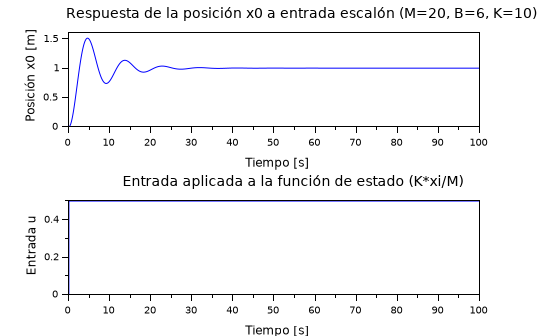

In [16]:
// --- Bloque de Declaración de Parámetros Globales y del Sistema ---
K = 10; // Constante del resorte (N/m)
M = 20; // Masa (kg)
B = 6;  // Coeficiente de amortiguamiento (Ns/m)
tF = 100; // Tiempo final de simulación (segundos)
global h; // Se declara 'h' como global aquí, ya que se usa en la función modMRA
h = 0.01; // Paso de tiempo para la integración numérica
t_etapa = 0.01; // Paso de tiempo de la etapa para la función modMRA (debe ser igual o múltiplo de h)

// Condiciones iniciales y variables para almacenar resultados (también al inicio)
X_initial = [0; 0]; // x = [x0; dx0] (posición y velocidad inicial)
entrada_xi_step = 1; // Amplitud del escalón de entrada x_i (para entrada escalón unitario)


// --- Definición de la Función de Transferencia ---
s = poly(0, 's'); // Define 's' como la variable de Laplace
num = B*s + K;
den = M*s^2 + B*s + K;
FT = num / den;

disp("Función de Transferencia (FT):");
disp(FT);

// --- Polos del Sistema ---
disp("Polos de la Función de Transferencia:");
poles_FT = roots(den);
disp(poles_FT);

// --- Representación en Variables de Estado ---
A_matrix = [0, 1; -K/M, -B/M];
B_matrix = [0; 1/M];
C_matrix = [1, 0]; // ¡CORREGIDO! Para que x0_output sea la posición real de la masa (x0)
D_matrix = 0;

disp("Matriz A (Espacio de Estados):");
disp(A_matrix);
disp("Matriz B (Espacio de Estados):");
disp(B_matrix);
disp("Matriz C (Espacio de Estados):");
disp(C_matrix);
disp("Matriz D (Espacio de Estados):");
disp(D_matrix);


// --- Simulación Numérica usando la función modMRA del apunte ---

// Definición de la función modMRA (tomada del apunte - página 4)
function X_out = modMRA(current_t_etapa, x_ant, accion) // Renombrado t_etapa a current_t_etapa para evitar conflicto con global
    global h; // Usamos la variable h definida globalmente
    
    A_mod = [0, 1; -K/M, -B/M]; // Las matrices A_mod y B_mod usan M, B, K globales
    B_mod = [0; 1]; // Según el apunte, asume que 'accion' ya incorpora la masa.

    x = x_ant;
    u = accion;

    for rii = 1:current_t_etapa/h
        xp = A_mod * x + B_mod * u;
        x = x + xp * h;
    end
    X_out = x;
endfunction

// --- Bucle Principal de Simulación ---

ii = 0; // Contador de iteraciones (reiniciado para el bucle)

t_values = 0:t_etapa:tF; // Vector de tiempos para el ploteo
num_points = length(t_values);
x0_output = zeros(1, num_points); // Almacenar la salida x0 (posición de la masa)
input_u_applied = zeros(1, num_points); // Almacenar la entrada aplicada a la función modMRA

X_current = X_initial; // Reiniciar estado actual del sistema

for i = 1:num_points
    t_current = t_values(i);
    ii = ii + 1;

    // Calcular la entrada 'accion' para modMRA (escalón unitario en t=0.1s)
    if t_current >= 0.1 
        current_u = K * entrada_xi_step / M;
    else
        current_u = 0;
    end

    X_current = modMRA(t_etapa, X_current, current_u); // Actualiza el estado
    
    // Obtiene la salida x0 (posición) usando la C_matrix corregida
    x0_output(ii) = C_matrix * X_current;
    input_u_applied(ii) = current_u; // Almacena la entrada aplicada
end


// --- Ploteo de Resultados ---

subplot(2,1,1);
plot(t_values, x0_output);
title("Respuesta de la posición x0 a entrada escalón (M=20, B=6, K=10)");
xlabel("Tiempo [s]");
ylabel("Posición x0 [m]");
// grid(); // Se mantiene comentado, descomentar si se desea la cuadrícula

subplot(2,1,2);
plot(t_values, input_u_applied);
title("Entrada aplicada a la función de estado (K*xi/M)");
xlabel("Tiempo [s]");
ylabel("Entrada u");
// grid(); // Se mantiene comentado

**Análisis de los Resultados**

Los polos de la funcion de transferencia son numeros complejos conjugados
La parte real negativa indica que el sistema es estable, cualquier perturbación o energía inicial se disipa con el tiempo y el sistema regresa a un estado de equilibrio.

La parte imaginaria indica que la respuesta del sistema será oscilatoria, característico de un sistema subamortiguado, donde la masa oscila alrededor de su posición de equilibrio antes de asentarse. La magnitud de la parte imaginaria está directamente relacionada con la frecuencia de estas oscilaciones amortiguadas.
Esta informacion se ve confirmada por la figura obtenida.


2- Asignando los valores a K=10, M=20, B=1, obtener simulaciones numéricas para
una entrada escalón unitario.
A continuacion se presenta el codigo Scilab, en base al codigo proporcionado. L

La figura obtenida muestra el comportamiento oscilatorio amortiguado del sistema. 
Luego de aplicarse la perturbacion unitaria la posicion del cuerpo oscila alrededor del valor final. Se simulan 100 s y se observa que aun 
no se logra la estabilizacion, debido a la disminucion de B (efecto de amortiguacion).  


  "Función de Transferencia (FT):"
      10 +s      
   ------------  
   10 +s +20s^2  
  "Polos de la Función de Transferencia:"
  -0.025 + 0.7066647i
  -0.025 - 0.7066647i
  "Matriz A (Espacio de Estados):"
   0.    1.  
  -0.5  -0.05
  "Matriz B (Espacio de Estados):"
   0.
   0.05
  "Matriz C (Espacio de Estados):"
   1.   0.
  "Matriz D (Espacio de Estados):"
   0.

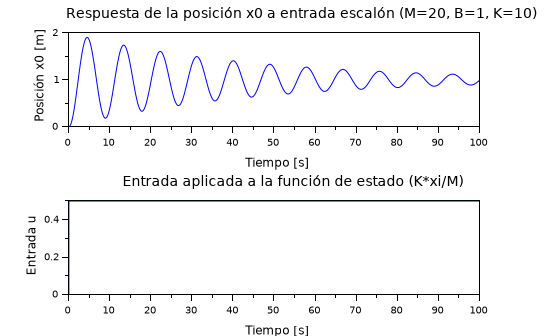

In [4]:
// --- Bloque de Declaración de Parámetros Globales y del Sistema ---
K = 10; // Constante del resorte (N/m)
M = 20; // Masa (kg)
B = 1;  // Coeficiente de amortiguamiento (Ns/m)
tF = 100; // Tiempo final de simulación (segundos)
global h; // Se declara 'h' como global aquí, ya que se usa en la función modMRA
h = 0.01; // Paso de tiempo para la integración numérica
t_etapa = 0.01; // Paso de tiempo de la etapa para la función modMRA (debe ser igual o múltiplo de h)

// Condiciones iniciales y variables para almacenar resultados (también al inicio)
X_initial = [0; 0]; // x = [x0; dx0] (posición y velocidad inicial)
entrada_xi_step = 1; // Amplitud del escalón de entrada x_i (para entrada escalón unitario)


// --- Definición de la Función de Transferencia ---
s = poly(0, 's'); // Define 's' como la variable de Laplace
num = B*s + K;
den = M*s^2 + B*s + K;
FT = num / den;

disp("Función de Transferencia (FT):");
disp(FT);

// --- Polos del Sistema ---
disp("Polos de la Función de Transferencia:");
poles_FT = roots(den);
disp(poles_FT);

// --- Representación en Variables de Estado ---
A_matrix = [0, 1; -K/M, -B/M];
B_matrix = [0; 1/M];
C_matrix = [1, 0]; // ¡CORREGIDO! Para que x0_output sea la posición real de la masa (x0)
D_matrix = 0;

disp("Matriz A (Espacio de Estados):");
disp(A_matrix);
disp("Matriz B (Espacio de Estados):");
disp(B_matrix);
disp("Matriz C (Espacio de Estados):");
disp(C_matrix);
disp("Matriz D (Espacio de Estados):");
disp(D_matrix);



// --- Simulación Numérica usando la función modMRA del apunte ---

// Definición de la función modMRA (tomada del apunte - página 4)
function X_out = modMRA(current_t_etapa, x_ant, accion) // Renombrado t_etapa a current_t_etapa para evitar conflicto con global
    global h; // Usamos la variable h definida globalmente
    
    A_mod = [0, 1; -K/M, -B/M]; // Las matrices A_mod y B_mod usan M, B, K globales
    B_mod = [0; 1]; // Según el apunte, asume que 'accion' ya incorpora la masa.

    x = x_ant;
    u = accion;

    for rii = 1:current_t_etapa/h
        xp = A_mod * x + B_mod * u;
        x = x + xp * h;
    end
    X_out = x;
endfunction

// --- Bucle Principal de Simulación ---

ii = 0; // Contador de iteraciones (reiniciado para el bucle)

t_values = 0:t_etapa:tF; // Vector de tiempos para el ploteo
num_points = length(t_values);
x0_output = zeros(1, num_points); // Almacenar la salida x0 (posición de la masa)
input_u_applied = zeros(1, num_points); // Almacenar la entrada aplicada a la función modMRA

X_current = X_initial; // Reiniciar estado actual del sistema

for i = 1:num_points
    t_current = t_values(i);
    ii = ii + 1;

    // Calcular la entrada 'accion' para modMRA (escalón unitario en t=0.1s)
    if t_current >= 0.1 
        current_u = K * entrada_xi_step / M;
    else
        current_u = 0;
    end

    X_current = modMRA(t_etapa, X_current, current_u); // Actualiza el estado
    
    // Obtiene la salida x0 (posición) usando la C_matrix corregida
    x0_output(ii) = C_matrix * X_current;
    input_u_applied(ii) = current_u; // Almacena la entrada aplicada
end



// --- Ploteo de Resultados ---

subplot(2,1,1);
plot(t_values, x0_output);
title("Respuesta de la posición x0 a entrada escalón (M=20, B=1, K=10)");
xlabel("Tiempo [s]");
ylabel("Posición x0 [m]");
// grid(); // Se mantiene comentado, descomentar si se desea la cuadrícula

subplot(2,1,2);
plot(t_values, input_u_applied);
title("Entrada aplicada a la función de estado (K*xi/M)");
xlabel("Tiempo [s]");
ylabel("Entrada u");
// grid(); // Se mantiene comentado

**Análisis de los Resultados**

Los polos de la funcion de transferencia son numeros complejos conjugados
La parte real negativa es menor que para el caso anterior, e indica que si bien el sistema es estable el tiempo de estabilizacion es mayor.
Esta informacion se ve confirmada por la figura obtenida.